In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('Titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [5]:
df_train.Pclass.unique()

array([3, 1, 2])

In [6]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
df_train.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [8]:
df_train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Target Variable - Survived

0: Did not Survive, 1: Survived
The survival rate is 38.38%

##### Independent Variables

- Age: The average age is around 29.7 years, with a minimum of 0.42 years and a maximum of 80 years.

- Pclass: The majority of passengers are in 3rd Class.

- Embarked: Embarked refers to the port where passengers boarded the ship. It has 3 values.

    - S = Southamption (England)
    - C = Cherbourg (France)
    - Q = Queenstown (Ireland)

- Parch: It stands for Parent/Children indicating number of children or parents had aboard the Titanic.

    - 0: Passenger was alone.
    - 1+: Passenger had atleast one parent or child onboard

- SibSp: It stands for Siblings/Spouse, indicating number of siblings or spouse a passenger had on the Titanic.

    - 0: Passeger was travelling alone.
    - 1+: Passenger had atleast one sibling or spouse onboard.

In [10]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_train.fillna({"Age": 29.0}, inplace=True)

In [12]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Given that the majority of passengers boarded from Southampton (England), the missing values will be filled with “S”.

In [13]:
df_train.fillna({"Embarked": 'S'}, inplace=True)

In [14]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Columns such as PassengerId, Name, Ticket, Cabin are not essential for model creation as they would diminish efficiency.

In [15]:
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
df_train.replace({"Sex": {"male": 0, "female": 1}}, inplace=True)

/var/folders/y9/54zzfyhs7f72c0_0zfrb98yr0000gn/T/ipykernel_8101/3421960352.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace({"Sex": {"male": 0, "female": 1}}, inplace=True)


In [18]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [19]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True, dtype = 'int')

In [20]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


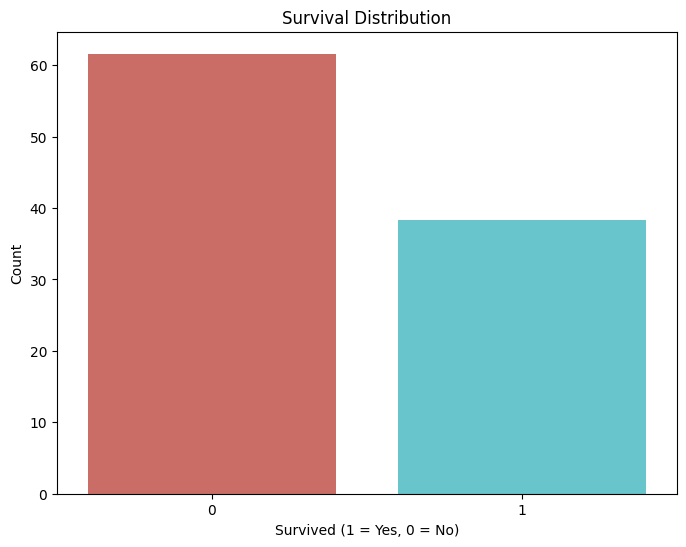

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8,6))
sns.countplot(df_train, x='Survived', palette='hls', stat='percent')
plt.title('Survival Distribution')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

#### More than 60% of passengers did not survive.

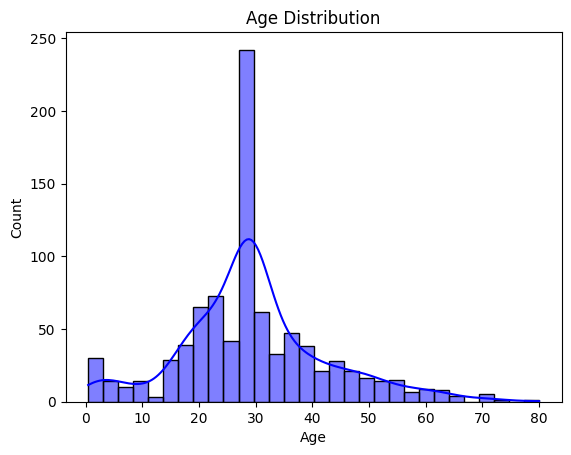

In [22]:
sns.histplot(df_train.Age, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#### Majority of passengers are between 20 and 40 years old.
#### As observed from the provided table, the youngest passenger was 0.42 years old, while the oldest passenger was 80 years old.

Text(0, 0.5, 'Fare')

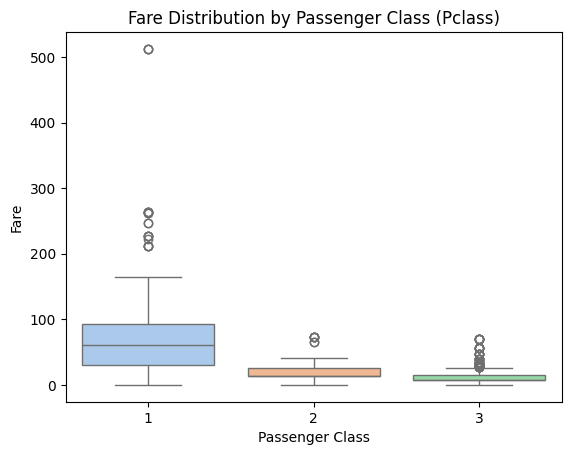

In [23]:
sns.boxplot(df_train, x='Pclass', y='Fare', palette='pastel')
plt.title("Fare Distribution by Passenger Class (Pclass)")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")

#### First-class passengers paid substantially higher fares, while third-class passengers had the lowest fares.
#### There are some outliers in the fare values, which are likely attributable to luxurious cabin bookings.

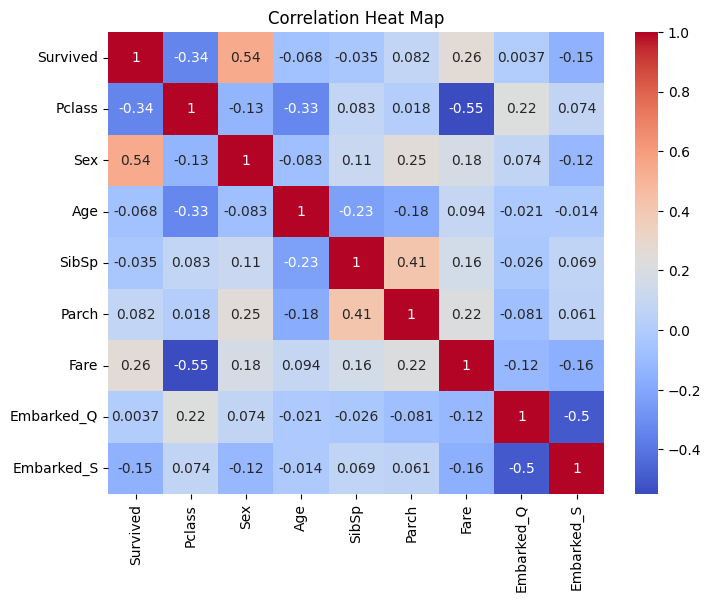

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()

#### The correlation coefficient between Fare and Pclass is -0.55, indicating a moderate negative relationship. This suggests that passengers in higher classes tend to pay higher fares.
#### Survival Rate is positively correlated with Fare (0.26) and negatively correlated with Pclass (-0.34). This suggests that first-class passengers had higher survival rates compared to passengers in lower classes.

### Creating a Logistic Regression Model

In [25]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [26]:
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0:1]

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,0,1
888,3,1,29.0,1,2,23.4500,0,1
889,1,0,26.0,0,0,30.0000,0,0


In [28]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
model.coef_

array([[-1.07186429e+00,  2.61012585e+00, -3.87381883e-02,
        -3.18278625e-01, -7.81796819e-02,  2.18153767e-03,
         2.87929779e-02, -3.72732498e-01]])

In [31]:
model.predict_proba(X)

array([[0.90801294, 0.09198706],
       [0.08652234, 0.91347766],
       [0.38099819, 0.61900181],
       ...,
       [0.51790998, 0.48209002],
       [0.39178714, 0.60821286],
       [0.87611001, 0.12388999]], shape=(891, 2))

In [32]:
y_pred = model.predict(X)

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [34]:
cm = confusion_matrix(y, y_pred)
cm

array([[475,  74],
       [101, 241]])

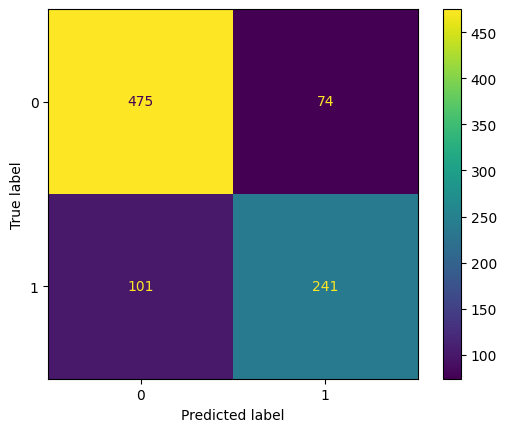

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



- True Negative (TN) = 475: The model correctly predicted 474 passengers did not survive.
- False Positive (FP) = 74: The model incorrectly predicted 75 passengers survived.
- False Negative (FN) = 101: The model incorrectly predicted 102 passengers did not survive when they - actually did.
- True Positive (TP) = 241: The model correctly predicted 240 passengers survived.
- Accuracy: 80%
- Model has 84% accuracy of predicting 0s and 73% accuracy of predicting 1s.
- Recall or True Positive Rate is (241/(241+101)) ie. 70.4%. For 0 it is 87% and for 1 it is 70%.

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_score = roc_auc_score(y, y_pred)
roc_score

0.7849439171699741

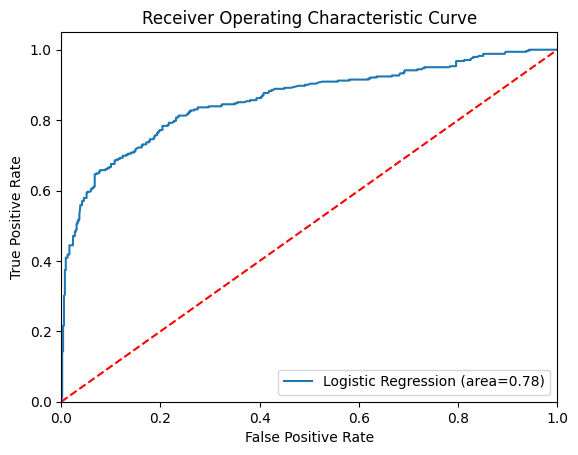

In [38]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc = 'lower right')
plt.show()

##### The ROC Curve shows a moderate AUC (78%), indicating that the model effectively distinguishes between survivors and non-survivors.

Interpretation of Logistic Regression Coefficients:

- Sex (2.56) – The strongest positive factor; being female greatly increases survival probability.
- Embarked_Q (0.28) – Slightly increases survival probability.
- Fare (0.11) – Higher fare increases the likelihood of survival.
- Parch (-0.07) – Slight negative impact, meaning having more parents/children aboard slightly reduces - survival odds.
- SibSp (-0.24) – More siblings/spouses aboard decreases survival probability.
- Embarked_S (-0.38) – Boarding at Southampton reduces survival probability.
- Age (-0.50) – Older passengers had lower survival odds.
- Pclass (-1.09) – Higher class (1st class) significantly increased survival, while lower class (3rd) - decreased it.

#### Women, higher-class passengers, and those who paid higher fares had better survival chances.

#### Older passengers and those from lower classes had lower survival rates.

In [39]:
test_data = pd.read_csv("Titanic_test.csv")  

# Convert categorical variables (same preprocessing as training data)
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
test_data["Embarked_Q"] = (test_data["Embarked"] == "Q").astype(int)
test_data["Embarked_S"] = (test_data["Embarked"] == "S").astype(int)

# Select features (same as the trained model)
X_test = test_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_Q", "Embarked_S"]]

# Fill missing values (same strategy as training)
X_test.fillna(X_test.mean(), inplace=True)

In [40]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1


In [41]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,1,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,1,0
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,1


In [42]:
predictions = model.predict(X_test)

In [43]:
# Convert probabilities to binary outcomes (1 = Survived, 0 = Not Survived)
test_data["Survived"] = (predictions >= 0.5).astype(int)

# Save results
test_data[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Survived']]

,PassengerId,Pclass,Name,Sex,Age,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1
...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0


In [44]:
import pickle

# Save the trained model
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)

#### Interview Questions:

##### 1. What is the difference between precision and recall?

Precision: Out of all the predicted positives, how many were actually positive

Formula: (TP / (TP + FP))

Recall: Out of all actual positives, how many did we correctly predict

Formula: (TP / (TP + FN))

##### 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to assess how well a machine learning model generalises to an independent dataset.

Binary classification means predicting one of two classes (e.g., survived/died, spam/ham, True/False). Cross-validation helps in the following ways:

- Better model evaluation
- Reduces overfitting risk
- Works well with small datasets
- Compares models fairly